# 사운드 프로세싱 기초

소리는 공기를 구성하는 입자들이 진동하는 현상이다. 공기의 진동을 측정하는 양적 기준을 음압(sound pressure)라고 한다. 사운드 데이터란 이 음압의 변화를 기록한 시계열 데이터이다. 

## 사인 함수

음압의 변화를 나타내는 시계열 데이터 중 가장 단순한 형태가 사인 함수(sine function)이다. 우선 사인 함수에 대해 알아보자. 삼각 함수 중 하나인 사인 함수는 다음과 같은 3가지 특징을 가진다.

* 진폭(amplitude) $A$: 위 아래로 움직이는 폭. 소리의 크기로 인식된다.
* 주파수(frequency) $\omega$ 또는 $f$: 진동 속도. 주파수가 높으면 빠르게 진동한다. 소리의 높낮이로 인식된다.
* 위상(phase) $\phi$: 사인 함수의 시작 시점. 위상 만큼 출발이 늦어진다. 위상의 차이는 소리의 시간차로 인식된다.

사인 함수를 수식으로 표현하면 다음과 같다. 

$$
A \sin\left(\omega t - \phi \right) 
$$

또는 

$$
A \sin\left(2\pi f t - \phi \right)
$$

여기에서 $t$는 시간을 나타내며 보통은 초(second) 단위다.

주파수(frequency)는 초당 진동의 횟수를 나타낸다. 1회전의 각도가 $360^{\circ} = 2\pi$ 라디안(radian)이므로 보통은 초당 라디안(radian per second) 단위로 표시하지만 이 값을 $2\pi$로 나누어 헤르쯔(Hz)라는 단위로 표시할 수도 있다. 1 Hz는 1초에 한 번 진동하는 주파수이다. 위 식에서 $\omega$는 초당 라디안 단위의 주파수이고 $f$는 헤르쯔 단위의 주파수이다.

$$ 
\omega = 2\pi f 
$$

다음은 여러가지 사인 함수를 보여주는 코드이다. 이 코드에서 `A`는 진폭, `w`는 주파수 `p`는 위상을 나타낸다.

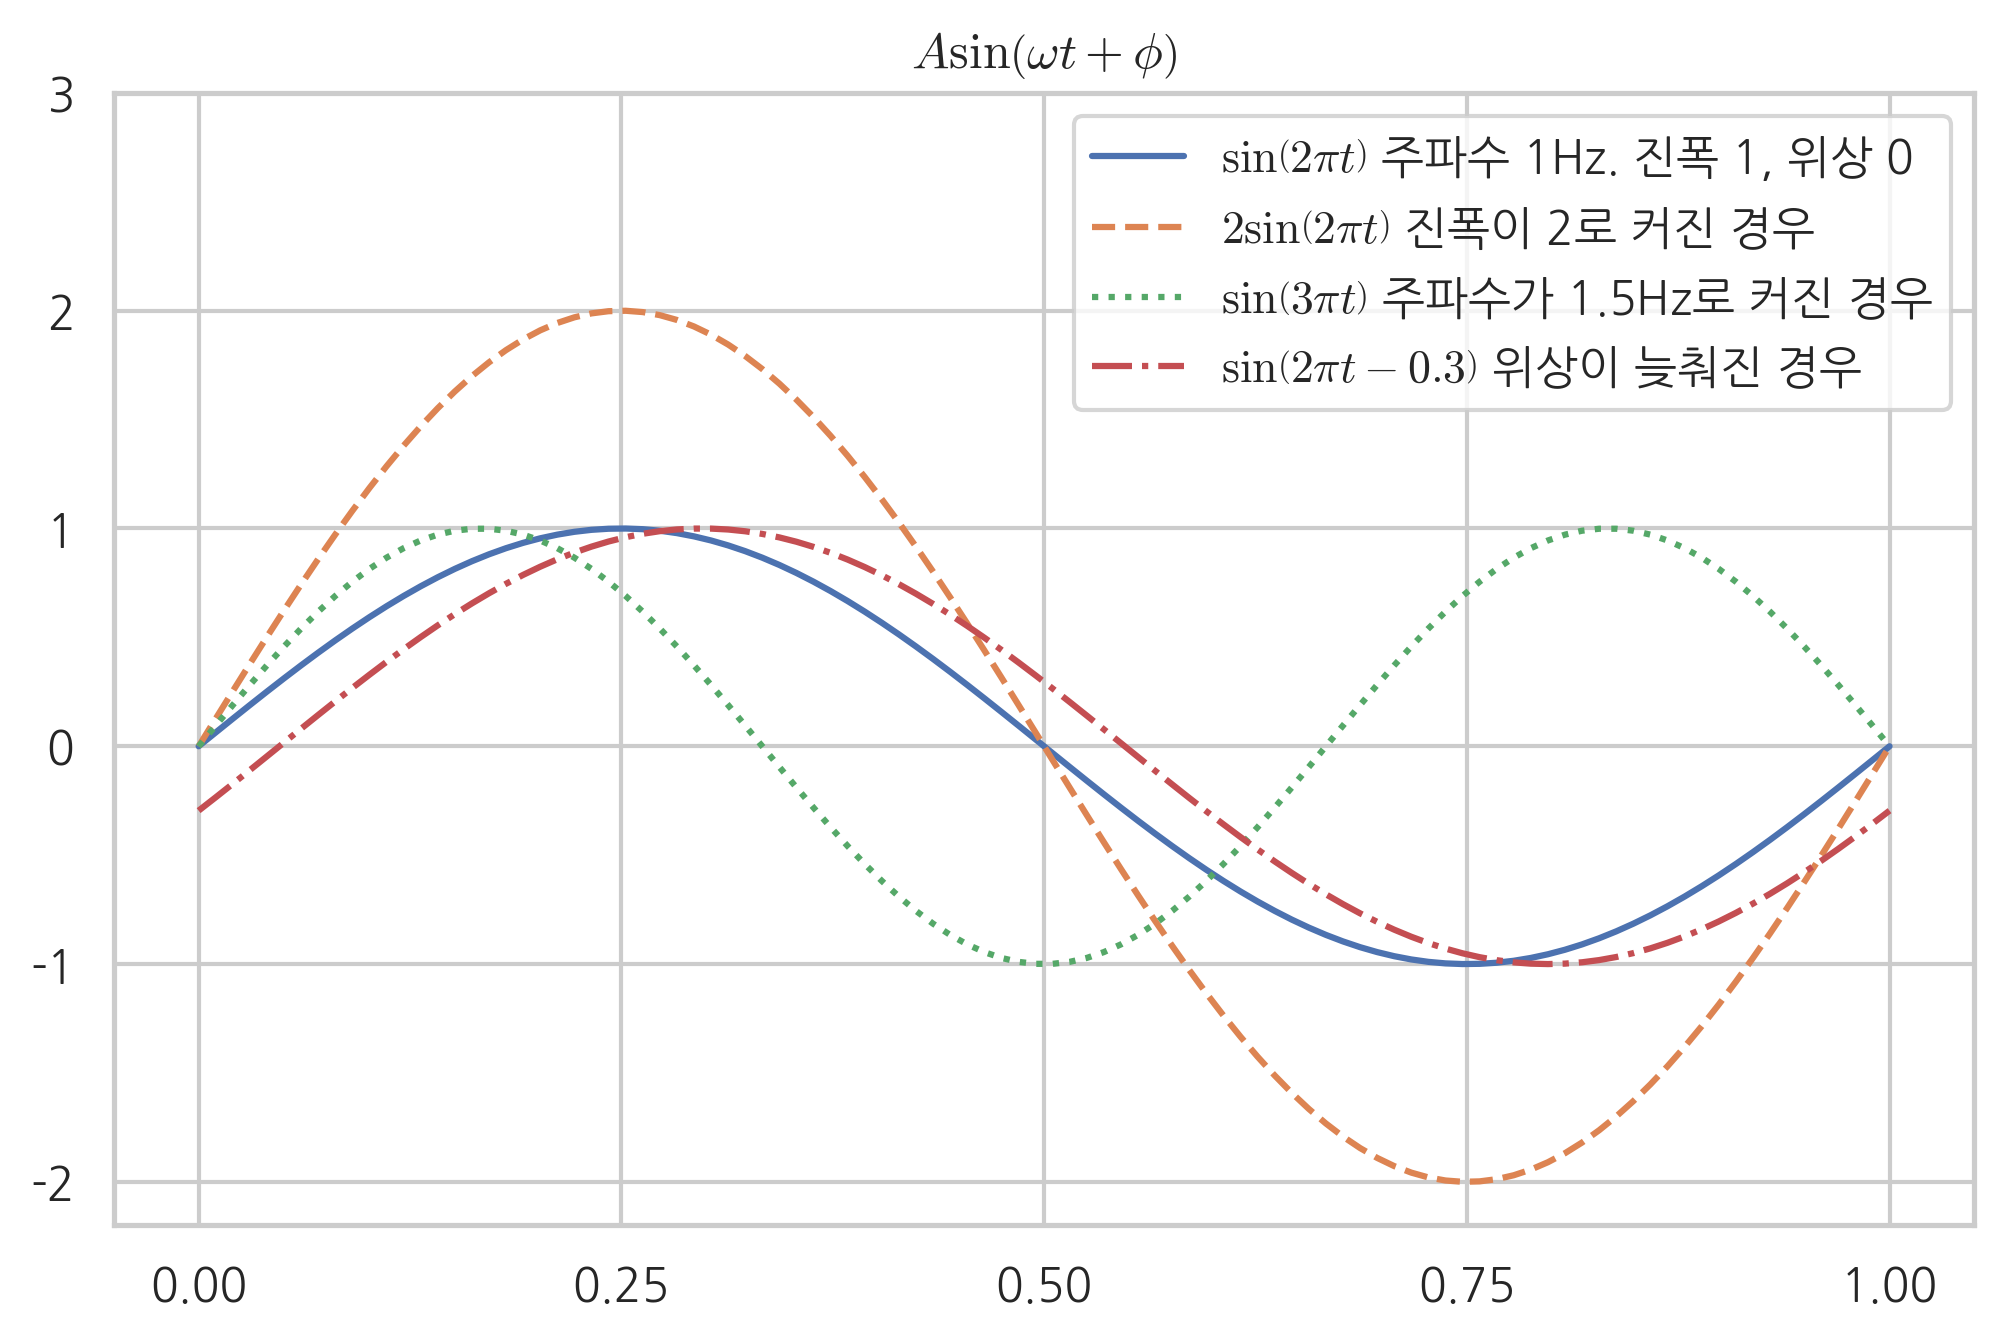

In [1]:
t = np.linspace(0, 1, 100)

plt.plot(t, 1 * np.sin(2 * np.pi * t + 0), ls="-", label=r"$\sin\left(2\pi{t}\right)$ 주파수 1Hz. 진폭 1, 위상 0")
plt.plot(t, 2 * np.sin(2 * np.pi * t + 0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ 진폭이 2로 커진 경우 ")
plt.plot(t, 1 * np.sin(3 * np.pi * t + 0), ls=":", label=r"$\sin\left(3\pi{t}\right)$ 주파수가 1.5Hz로 커진 경우")
plt.plot(t, 1 * np.sin(2 * np.pi * t - 0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ 위상이 늦춰진 경우")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

코사인 함수는 사인 함수와 위상이 90도 =$\frac{\pi}{2}$ 라디안 차이가 있으므로 사인 함수의 일종으로 볼 수 있다.

$$ \cos(2\pi t) = \sin \left( 2\pi t - \frac{\pi}{2} \right) $$ 

## 주기와 주파수의 관계

주파수 $f$의 역수를 주기 $T$라고 한다. 주기는 1번의 진동에 필요한 시간을 뜻한다. 

$$ f = \dfrac{1}{T} $$

또는

$$ \omega = \dfrac{2\pi}{T} $$

따라서 사인 함수는 다음처럼 쓸 수도 있다.

$$
A \sin\left(\dfrac{2\pi}{T} t - \phi \right)
$$

## 싱글 톤

주파수는 사람에게 음의 높이(tone)로 인식된다. 사인파처럼 주파수가 일정한 음압 시계열은 사람에게 음높이가 일정한 "삐-"하는 기계음으로 들리기 때문에 하나의 사인파로 이루어진 소리를 싱글 톤(single tone)이라고도 한다. 전화를 걸 때 수신자가 전화를 받기 전까지 재생되는 통화연결음(ring tone)은 보통 400Hz~450Hz의 싱글 톤을 사용한다.

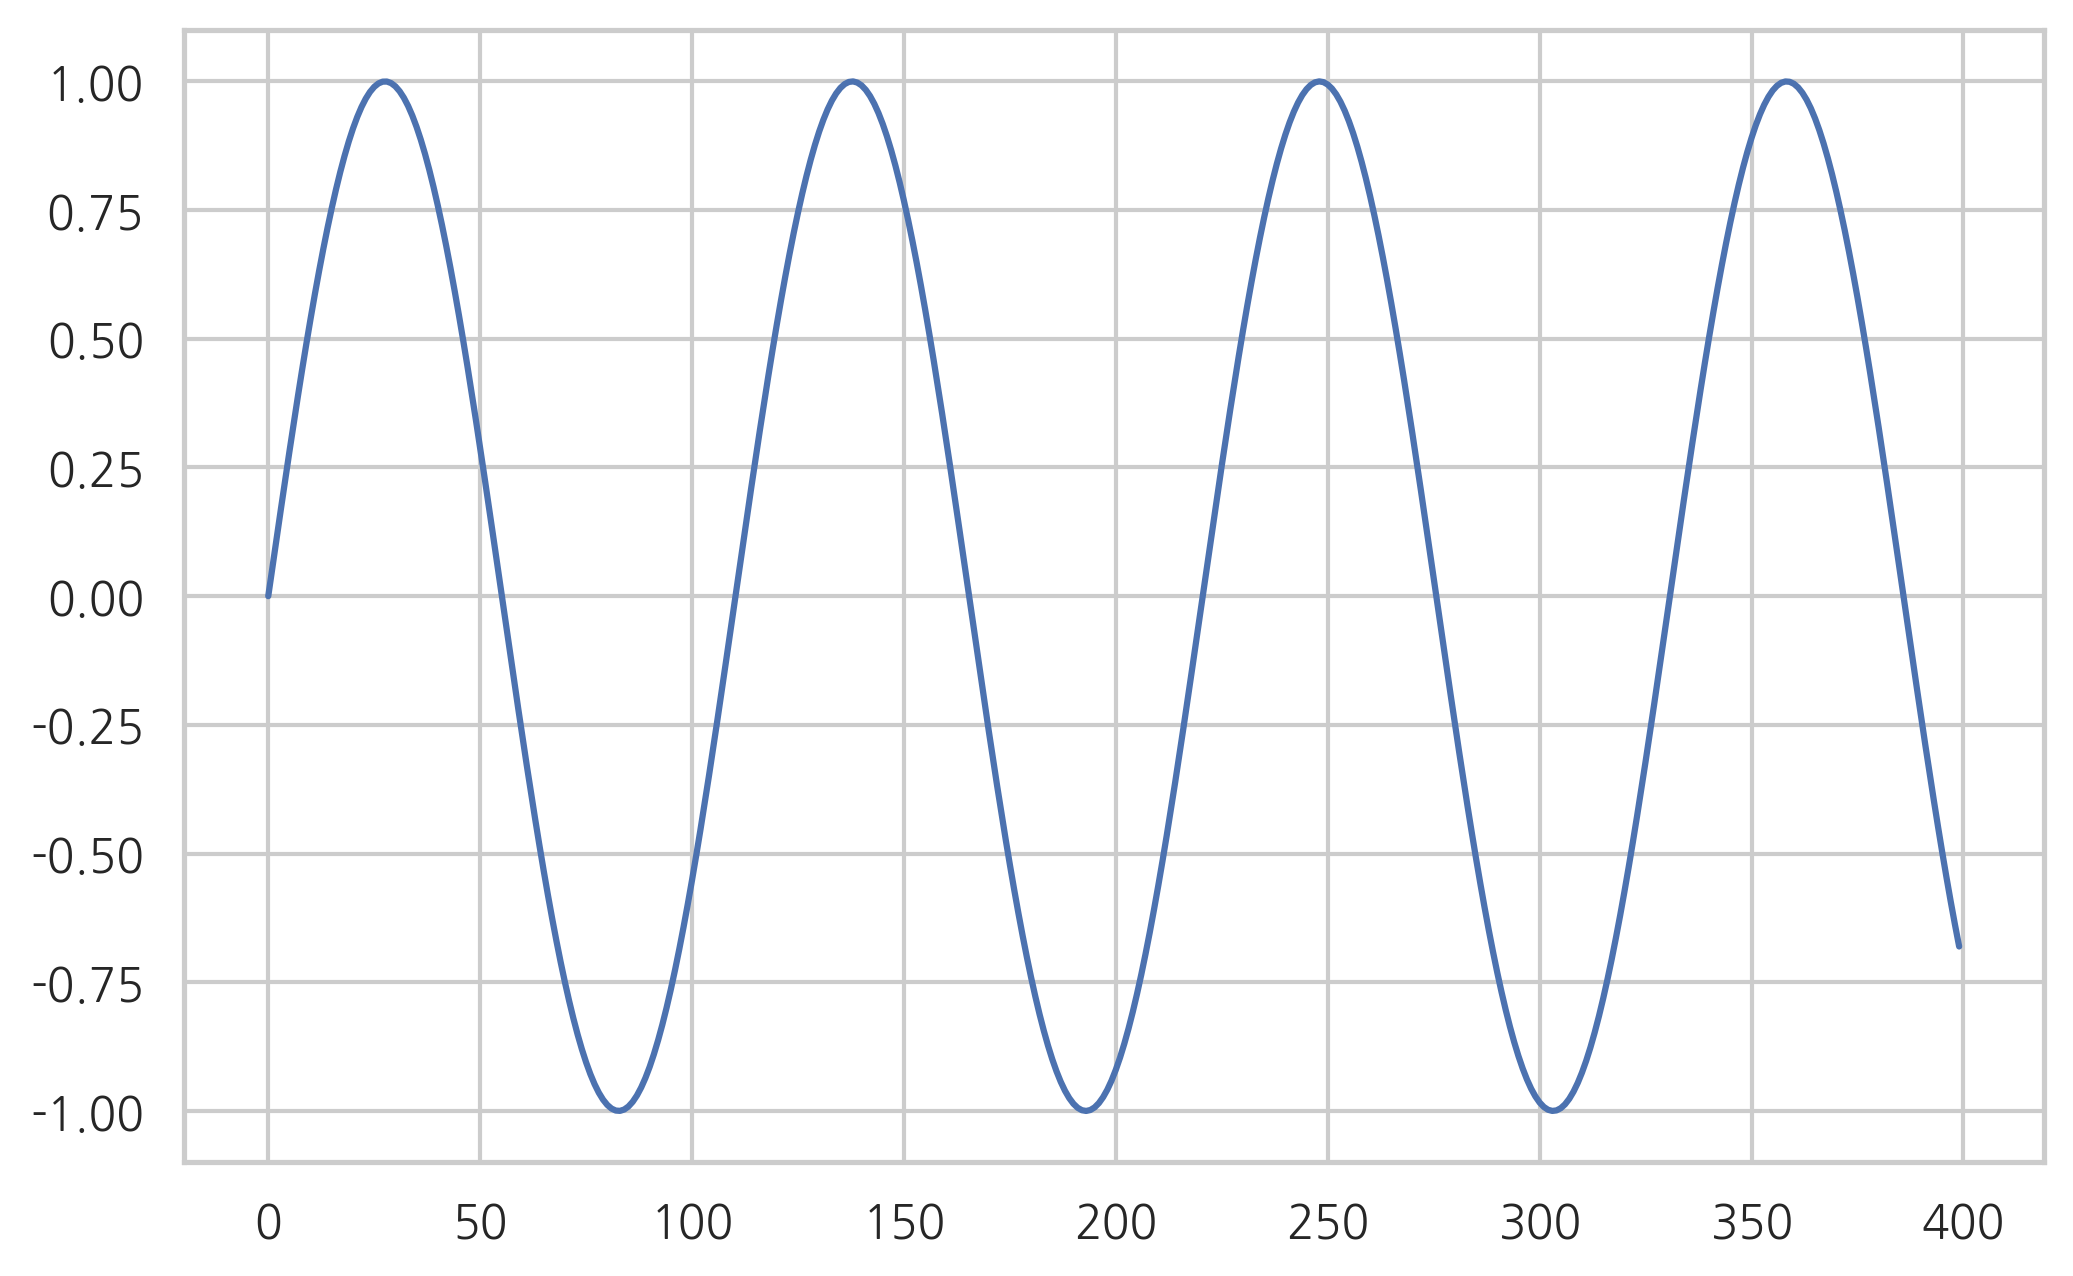

In [2]:
def single_tone(frequecy, sampling_rate=44100, duration=1):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

plt.plot(y[:400])
plt.show()

주피터 노트북에서는 다음 코드로 사운드 데이터를 표시할 수 있다.

In [3]:
from IPython.display import Audio, display

display(Audio(y, rate=44100))

음계에서 기준이 되는 가온다(middle C)음은 261.62Hz의 싱글 톤이다.
반음(semitone, half tone, half step)이 올라갈 때마다 $2^{\frac{1}{12}}$배만큼 주파수가 높아지고 12반음 즉, 1옥타브(octave)가 올라가면 주파수는 2배가 된다. 


다음 코드는 가온다로부터 한 옥타브의 음에 대해 계산한 주파수이다.

In [4]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 261.62 * 2**(np.arange(0, len(notes)) / 12.)
notes = list(zip(notes, freqs))
notes

[('C', 261.62),
 ('C#', 277.17673474627884),
 ('D', 293.6585210786982),
 ('D#', 311.1203654270119),
 ('E', 329.6205450734967),
 ('F', 349.2208026479644),
 ('F#', 369.98655218804913),
 ('G', 391.9870974524774),
 ('G#', 415.29586321592035),
 ('A', 439.9906403173536),
 ('A#', 466.1538452797511),
 ('B', 493.87279536756927),
 ('C', 523.24)]

In [5]:
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

복수의 싱글톤을 더하여 한번에 소리를 내면 화음이 된다. 예를 들어 도(C) 미(E) 솔(G) 3도 화음은 다음과 같다.

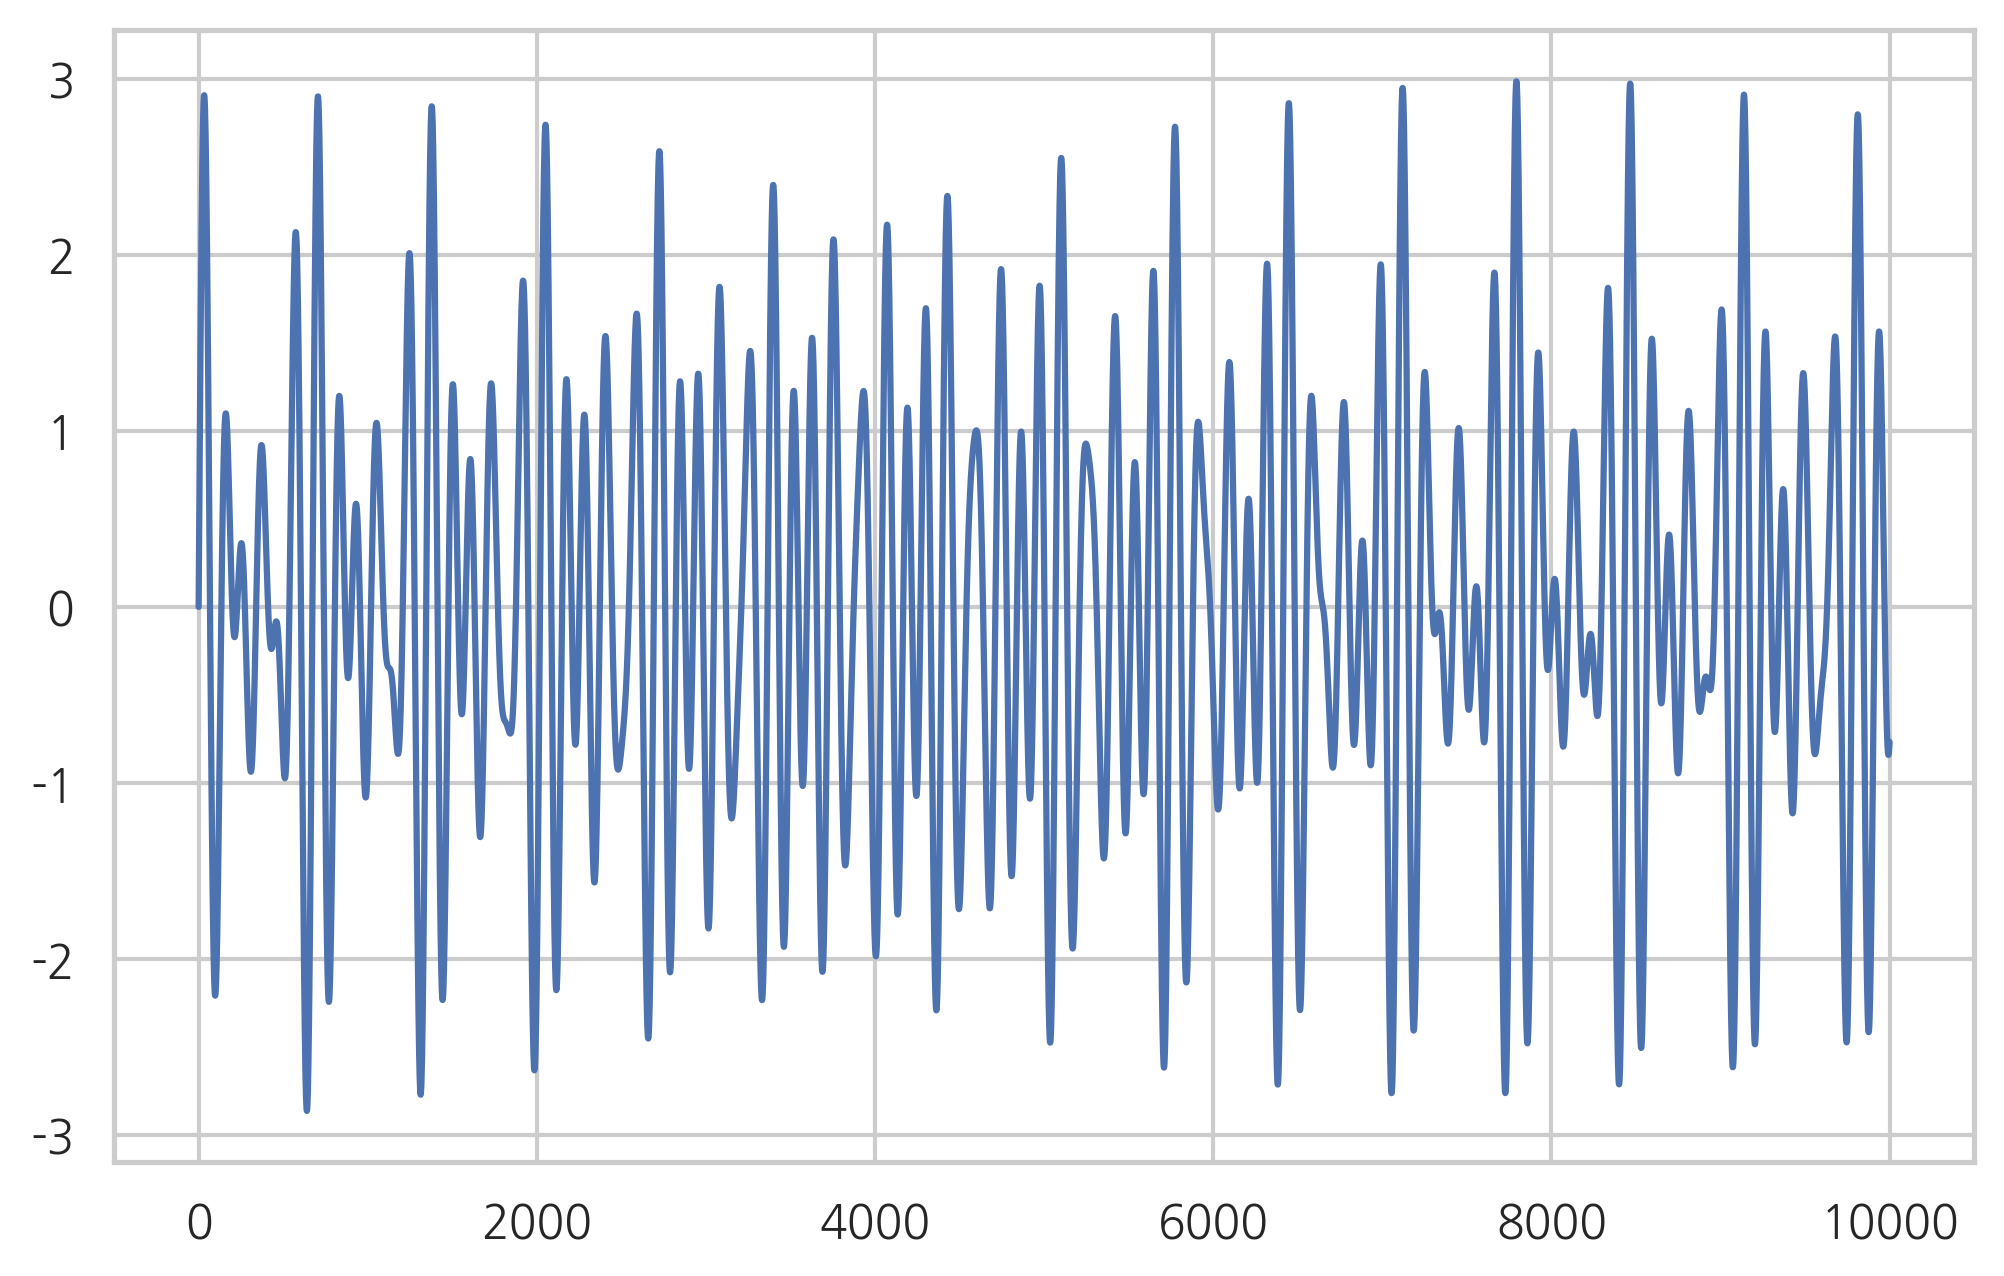

In [6]:
tone_C = single_tone(261.62)
tone_E = single_tone(329.62)
tone_G = single_tone(392)
harmony = tone_C + tone_E + tone_G

plt.plot(harmony[:10000])
plt.show()

In [7]:
display(Audio(harmony, rate=44100))

## wave 형식 파일

wave 파일은 음압 시계열 데이터를 저장하는 가장 기본적인 파일 형식으로 `.wav` 확장자로 표시한다. wave 파일은 보통 초당 44100번 음압을 측정하고 $-32768 \sim 32767(=2^{15})$까지의 2바이트(bytes) 숫자로 기록한다. 

파이썬에서 wave 파일을 쓰거나 읽기 위해서는 scipy 패키지의 io.wavfile 서브패키지에서 제공하는 `read`, `write` 명령을 사용한다.

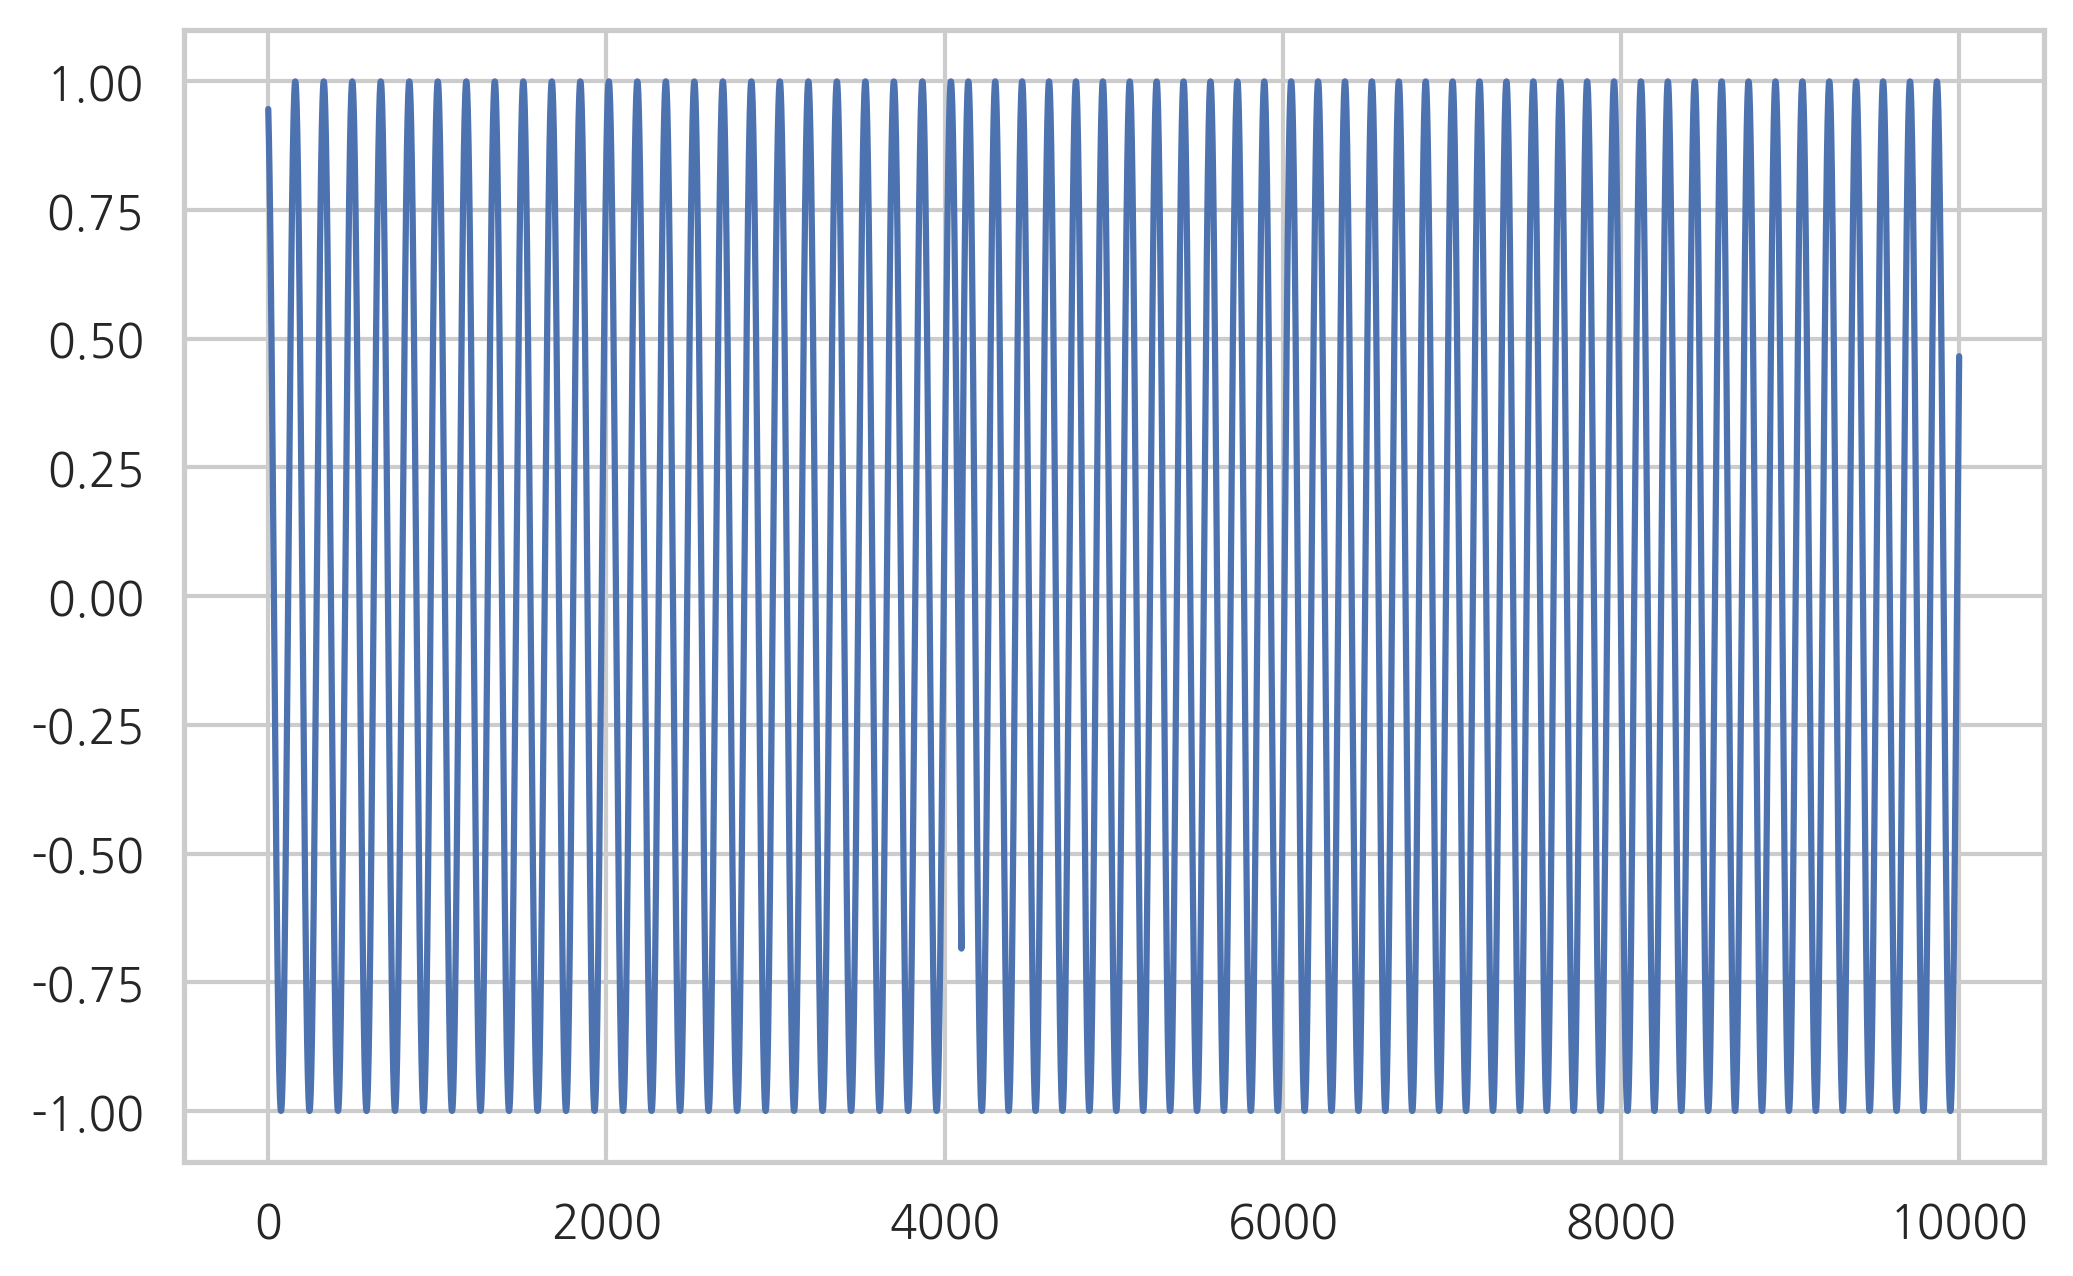

In [8]:
import scipy.io.wavfile

# 초당 샘플링 데이터 수 
sampling_rate = 44100
sp.io.wavfile.write("octave.wav", sampling_rate, octave)

sr, y_read = sp.io.wavfile.read("octave.wav")
# sr == sampling_rate

plt.plot(y_read[40000:50000])
plt.show()

In [9]:
Audio(y_read, rate=sr)

## Dual-tone multi-frequency signaling

전화는 DTMF(Dual-tone multi-frequency) 방식이라는 두 싱글톤 조합의 음향 신호로 전화번호를 입력받는다.

<table>
<tbody><tr>
<th align="center">
</th>
<th align="center">1209&nbsp;Hz
</th>
<th align="center">1336&nbsp;Hz
</th>
<th align="center">1477&nbsp;Hz
</th>
<th align="center">1633&nbsp;Hz
</th></tr>
<tr>
<th align="center">697&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/b/bf/Dtmf1.ogg" class="internal" title="Dtmf1.ogg">1</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/7/7d/Dtmf2.ogg" class="internal" title="Dtmf2.ogg">2</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/2/28/Dtmf3.ogg" class="internal" title="Dtmf3.ogg">3</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/d/d5/DtmfA.ogg" class="internal" title="DtmfA.ogg">A</a>
</td></tr>
<tr>
<th align="center">770&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/9f/Dtmf4.ogg" class="internal" title="Dtmf4.ogg">4</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/1/1c/Dtmf5.ogg" class="internal" title="Dtmf5.ogg">5</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/7/7b/Dtmf6.ogg" class="internal" title="Dtmf6.ogg">6</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/5/5a/DtmfB.ogg" class="internal" title="DtmfB.ogg">B</a>
</td></tr>
<tr>
<th align="center">852&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/9f/Dtmf7.ogg" class="internal" title="Dtmf7.ogg">7</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/f/f7/Dtmf8.ogg" class="internal" title="Dtmf8.ogg">8</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/5/59/Dtmf9.ogg" class="internal" title="Dtmf9.ogg">9</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/96/DtmfC.ogg" class="internal" title="DtmfC.ogg">C</a>
</td></tr>
<tr>
<th align="center">941&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/e/e7/DtmfStar.ogg" class="internal" title="DtmfStar.ogg">*</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/2/2d/Dtmf0.ogg" class="internal" title="Dtmf0.ogg">0</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/c/c4/Dtmf-.ogg" class="internal" title="Dtmf-.ogg">#</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/99/DtmfD.ogg" class="internal" title="DtmfD.ogg">D</a>
</td></tr></tbody></table>

#### 연습 문제 1

DTMF를 사용하여 자신의 전화번호를 호출하는 음향 신호를 생성하라.